In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ['Lenght','Width', 'Size','Conc',"Concl", 'Asym',"M3Long","M3Trans", "Alpha","Dist", "Class" ]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,Lenght,Width,Size,Conc,Concl,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df['Class'].unique()

array(['g', 'h'], dtype=object)

In [6]:
df["Class"] = (df['Class'] == 'g').astype(int)
df.Class

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: Class, Length: 19020, dtype: int64

In [7]:
df.head()

,Lenght,Width,Size,Conc,Concl,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


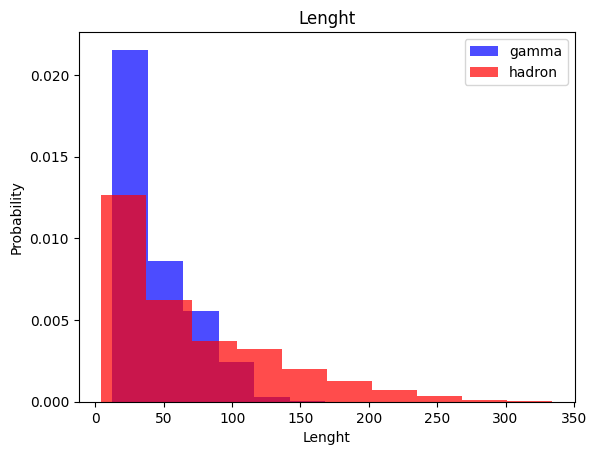

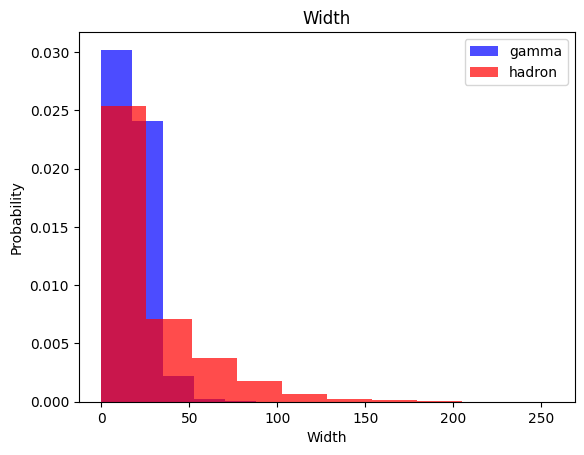

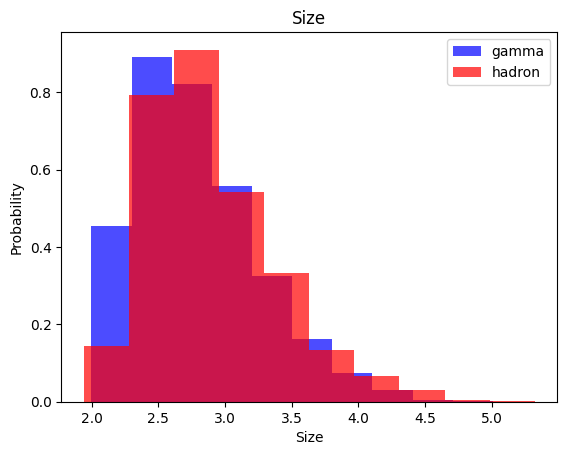

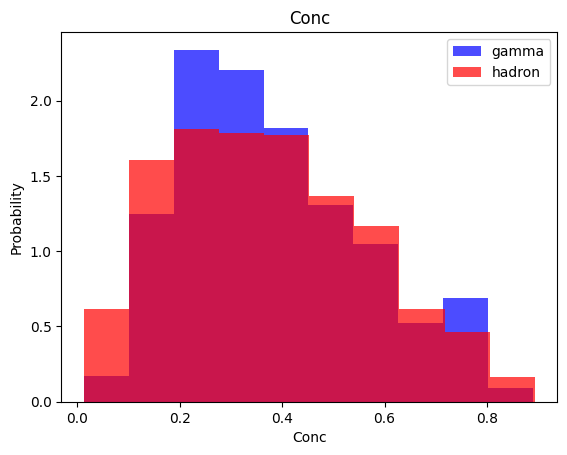

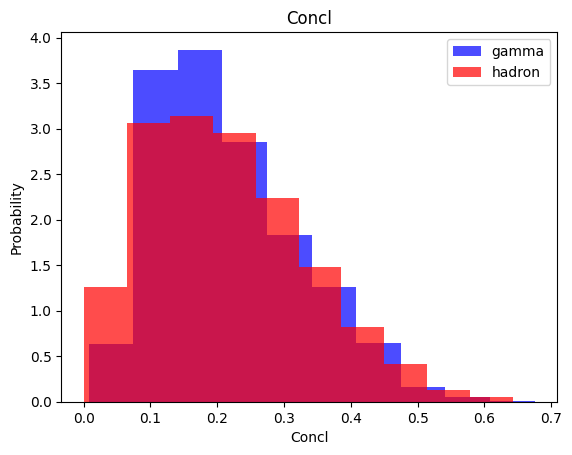

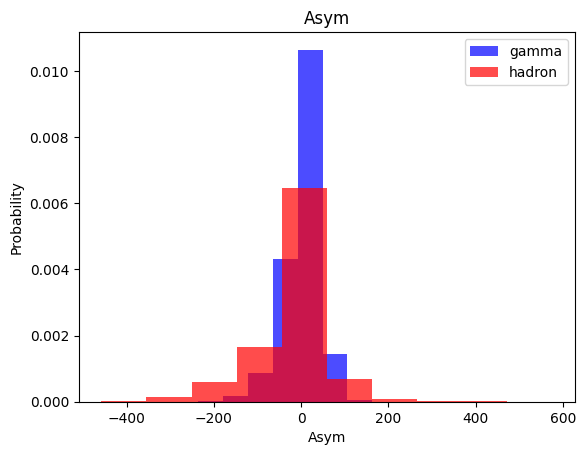

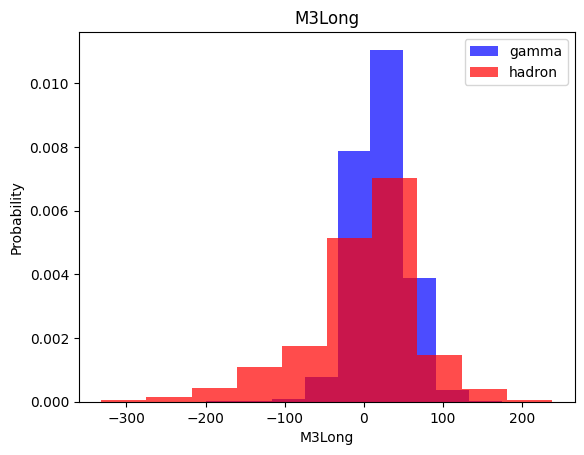

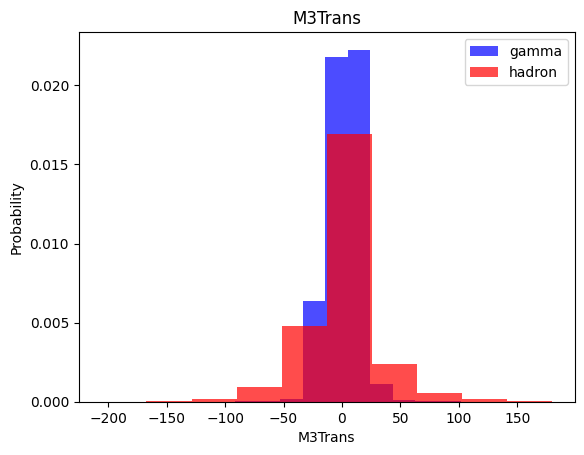

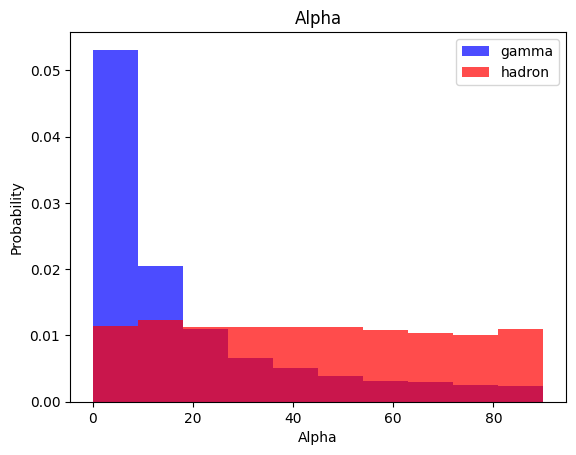

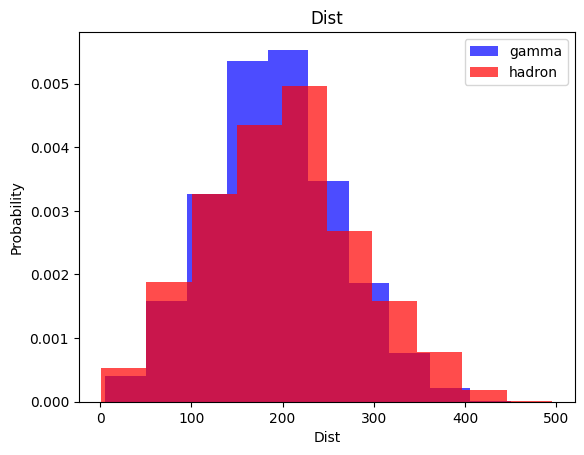

In [8]:
for label in cols[:-1]:
    plt.hist(df[df['Class']== 1][label], color="blue", label="gamma",alpha = 0.7, density = True )
    plt.hist(df[df['Class']== 0][label], color="red", label="hadron",alpha = 0.7, density = True )
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

### Train ,Validation, Test Datasets

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def scale_dataset(dataframe, oversample=False):
    # Select features (all columns except the last one) and target (the last column)
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Scale the features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # Oversample if required
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
        data = np.hstack((x, y.reshape(-1, 1)))
        return data, x, y
    else:
        return x, y

In [11]:
print(len(train[train['Class']==1])) #gamma
print(len(train[train['Class']==0])) #hadron

7397
4015


In [12]:
scale_dataset()

TypeError: scale_dataset() missing 1 required positional argument: 'dataframe'